In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline

<h2>Load Data</h2>

In [3]:
input_df = pd.read_csv('website-traffic.csv')
input_df['date_of_visit'] = pd.to_datetime(input_df.MonthDay.str.cat(input_df.Year.astype(str), sep=' '))

input_df[['date_of_visit', 'Visits']].head(10) 

,date_of_visit,Visits
0,2009-06-01,27
1,2009-06-02,31
2,2009-06-03,38
3,2009-06-04,38
4,2009-06-05,31
5,2009-06-06,24
6,2009-06-07,21
7,2009-06-08,29
8,2009-06-09,30
9,2009-06-10,22


<h2>Plot Time Series</h2>

<AxesSubplot:title={'center':'Website Visits per Day'}, xlabel='date_of_visit'>

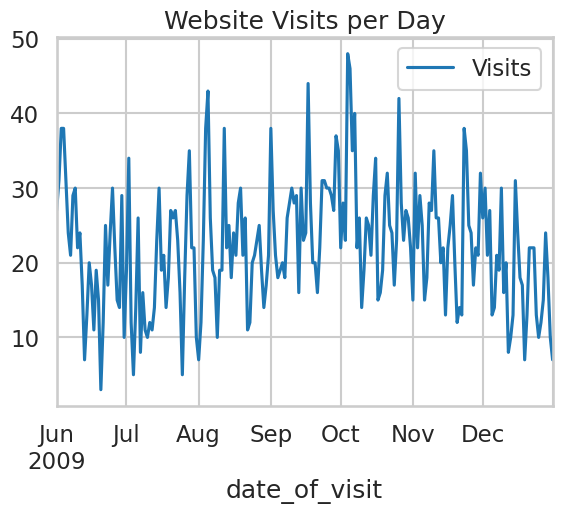

In [5]:
input_df.plot(x='date_of_visit', y='Visits', title="Website Visits per Day")

<h2>Plot Time Series Constituents</h2>

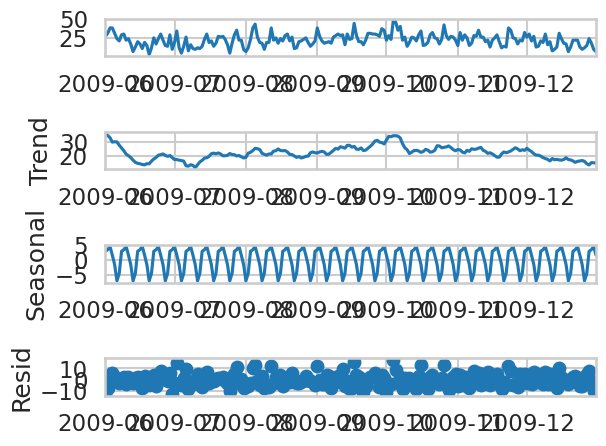

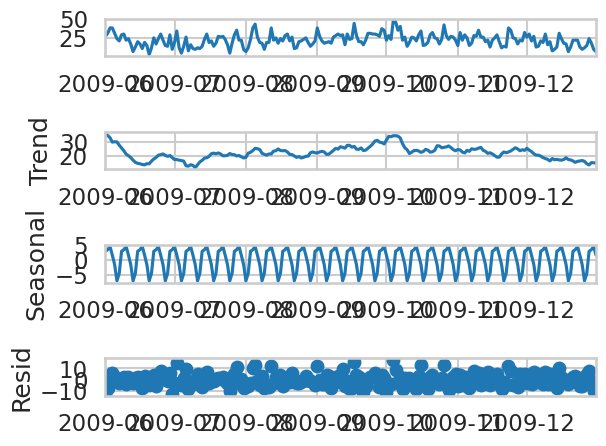

In [14]:
ts_visits = pd.Series(input_df.Visits.values, index=pd.date_range(input_df.date_of_visit.min(), input_df.date_of_visit.max(), freq='D'))
decompose = seasonal_decompose(ts_visits.interpolate(), extrapolate_trend='freq')
decompose.plot()

<h2>Moving Average</h2>

In [15]:
input_df['moving_average'] = input_df['Visits'].rolling(window=3, center=False).mean()
input_df[['Visits', 'moving_average']].head(10)

,Visits,moving_average
0,27,NaN
1,31,NaN
2,38,32.000000
3,38,35.666667
4,31,35.666667
5,24,31.000000
6,21,25.333333
7,29,24.666667
8,30,26.666667
9,22,27.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


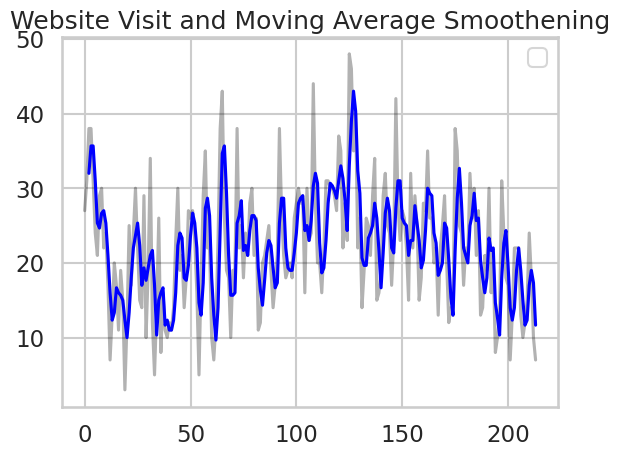

In [17]:
plt.plot(input_df.Visits,'-',color='black',alpha=0.3)
plt.plot(input_df.moving_average,color='b')
plt.title('Website Visit and Moving Average Smoothening')
plt.legend()

<h2>Exponentially Weighted Moving Average (EWMA)</h2>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


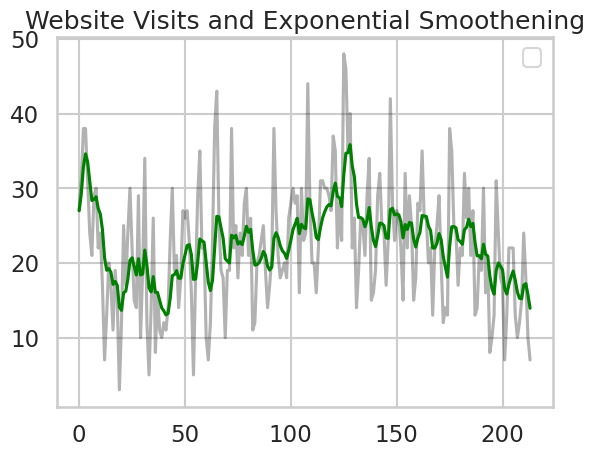

In [19]:
input_df['ewma'] = input_df['Visits'].ewm(halflife=3, ignore_na=False, min_periods=0, adjust=True).mean()
plt.plot(input_df.Visits, '-', color='black', alpha=0.3)
plt.plot(input_df.ewma, color='g')
plt.title('Website Visits and Exponential Smoothening')
plt.legend()